In [1482]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True, ignore='', dropna=True):
    columns = [c for c in df.columns if c_filter in c]
    if ignore:
        columns = [c for c in columns if ignore not in c]
    gd = df[columns]
    gd.set_index(df['epoch'], inplace=True)

    if dropna:
        gd = gd.dropna()
    if mean:
        gd = gd.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd.plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [1483]:
!scp -r osnielteixeira2@200.20.15.153:~/experiments/2024-10-23\ 1142 ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

epoch=239-step=1679.ckpt                      100%  178KB   2.7MB/s   00:00    
hparams.yaml                                  100%  210    10.2KB/s   00:00    
metrics.csv                                   100%   14KB   1.1MB/s   00:00    
params.pt                                     100%  495    49.4KB/s   00:00    


In [1484]:
metrics_path = './experiments/2024-10-23 1142/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [1485]:
# display(metrics, 'mvc', 'MVC Score')

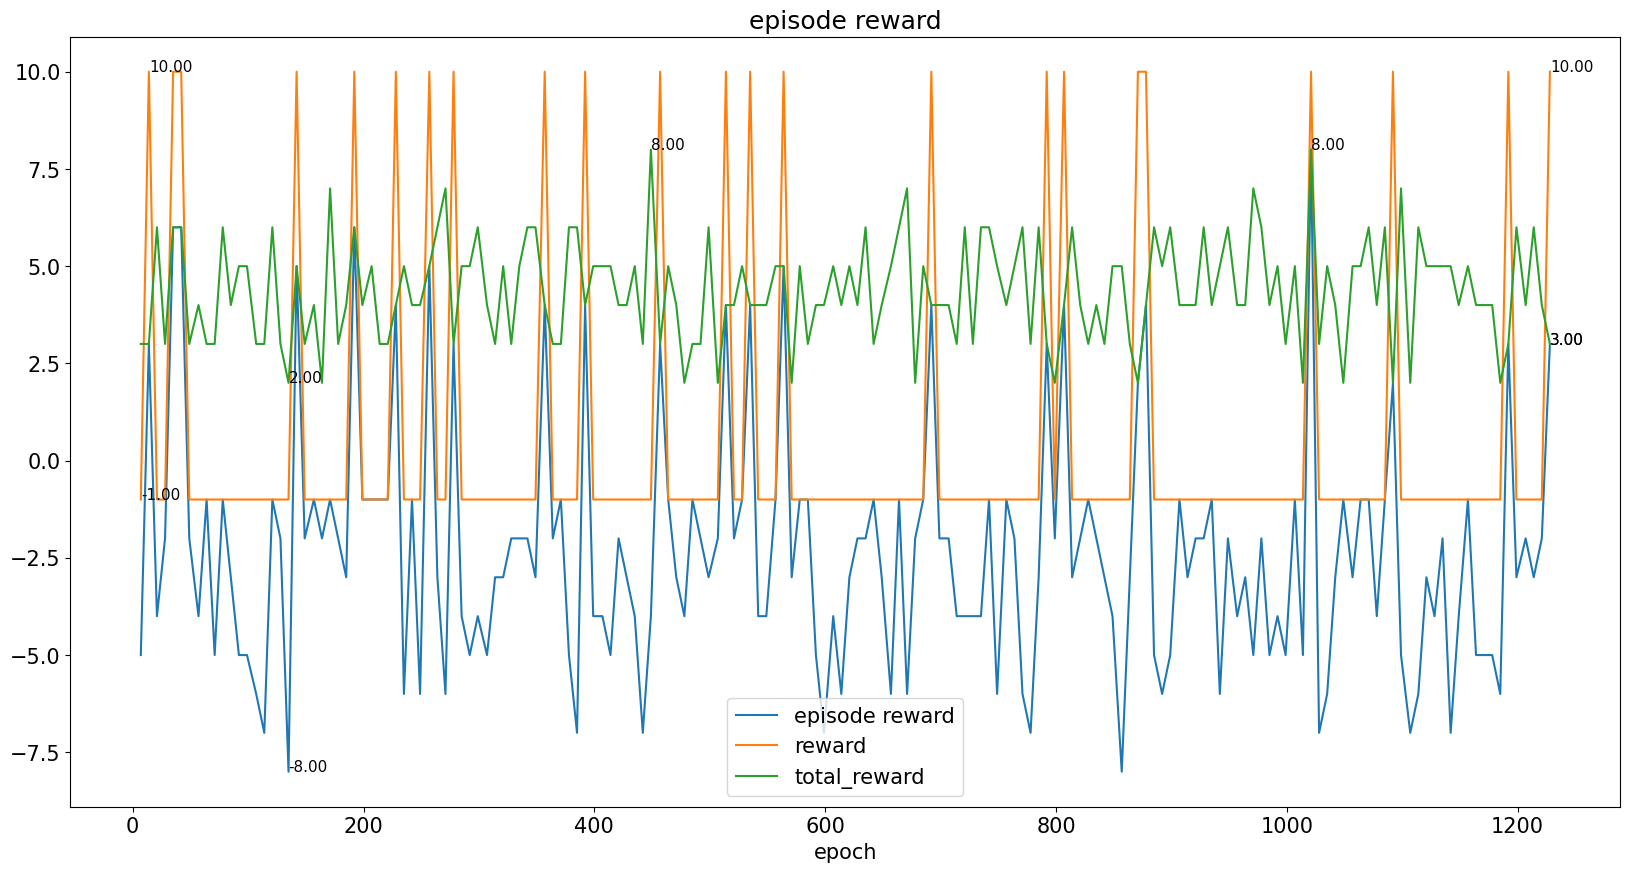

In [1486]:
display(metrics, 'reward', 'episode reward', ignore='val')

In [1487]:
# display(metrics, 'aon', 'All or Nothing')

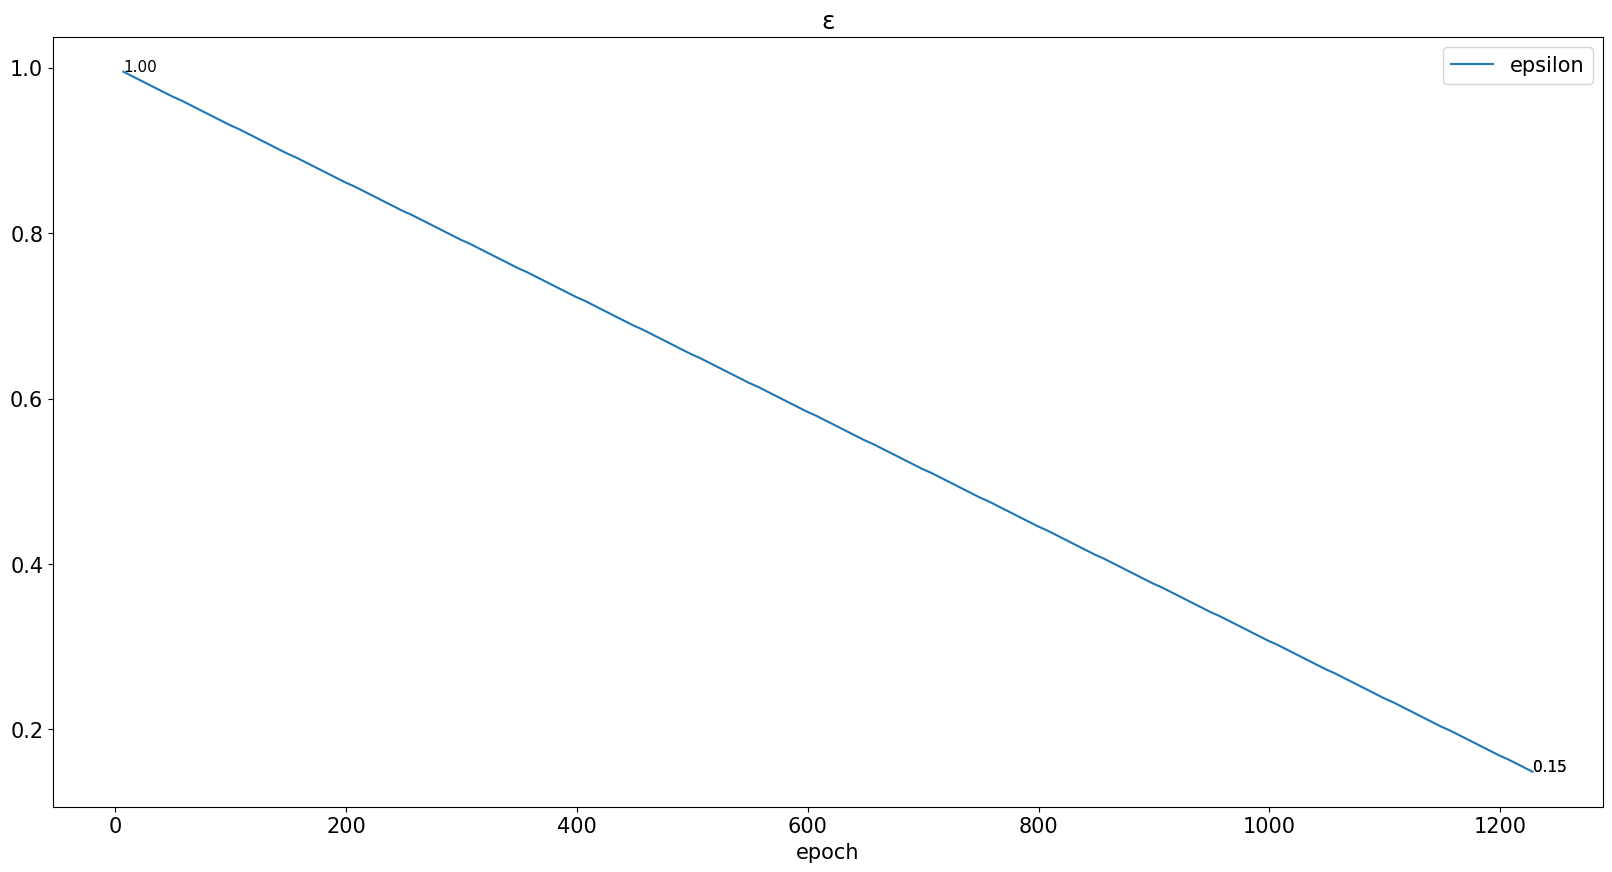

In [1488]:
display(metrics, 'epsilon', 'ε')

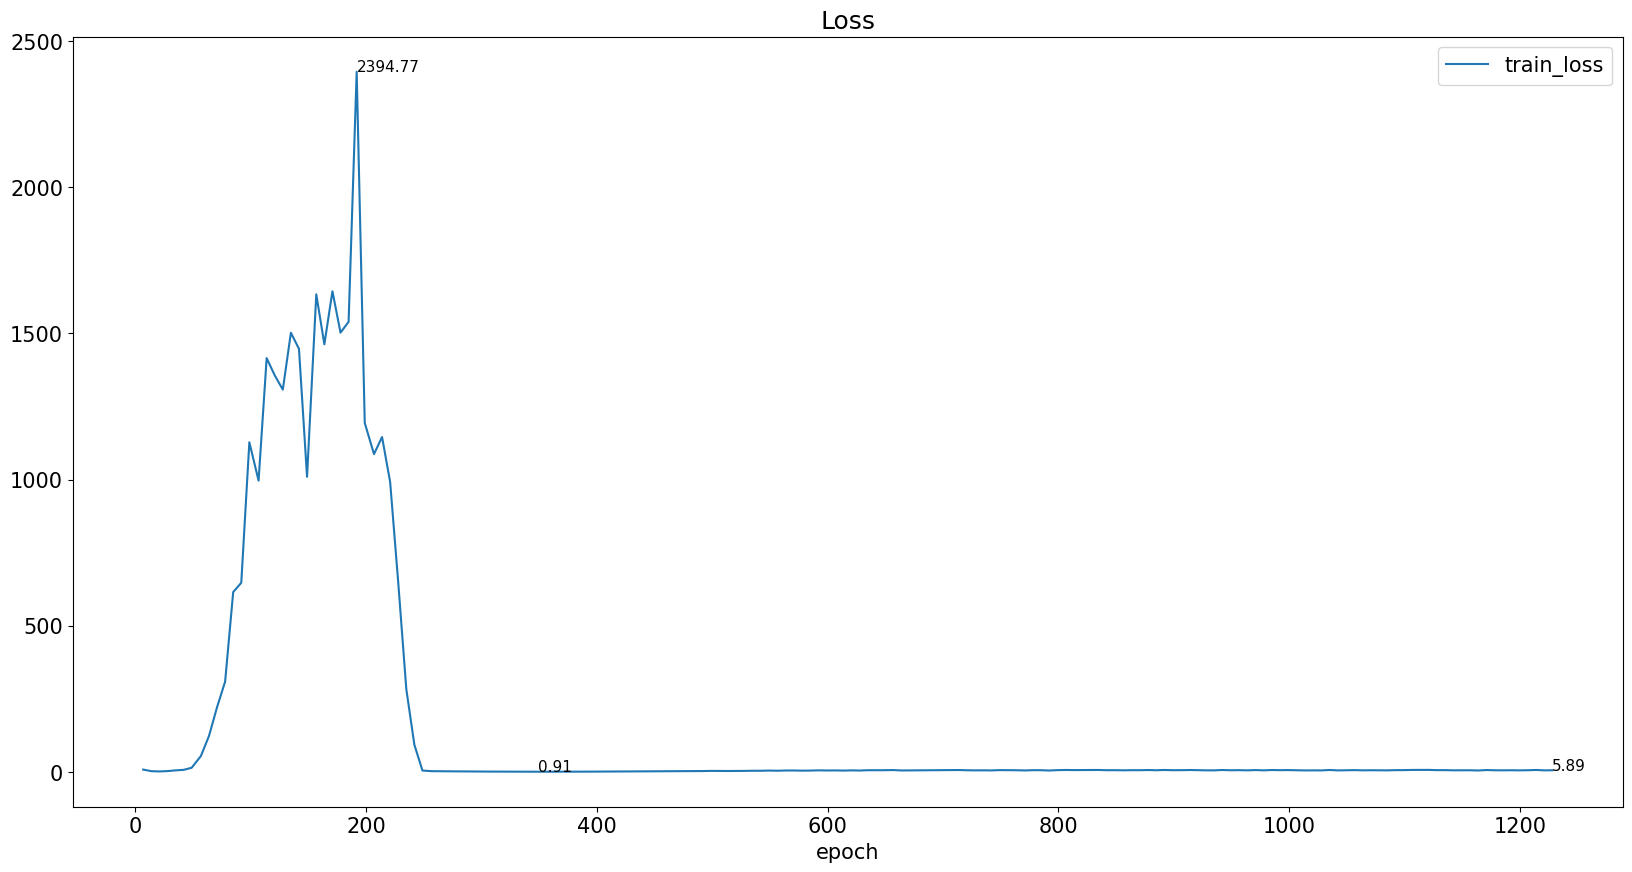

In [1489]:
display(metrics, 'loss', 'Loss')

In [1490]:
metrics

,epsilon,episode reward,reward,train_loss,total_reward,epoch,step,val_avg_reward,val_apx_ratio
0,0.995149,-5.0,-1.0,8.251554,3.0,7,49,NaN,NaN
1,0.990199,3.0,10.0,2.841312,3.0,14,99,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,19,139,6.36,1.394167
3,0.985249,-4.0,-1.0,1.904482,6.0,21,149,NaN,NaN
4,0.980299,-2.0,-1.0,3.016154,3.0,28,199,NaN,NaN
...,...,...,...,...,...,...,...,...,...
228,0.163549,-2.0,-1.0,5.982674,4.0,1207,8449,NaN,NaN
229,0.158599,-3.0,-1.0,6.942945,6.0,1214,8499,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,1219,8539,3.80,2.210834
231,0.153649,-2.0,-1.0,5.592115,4.0,1221,8549,NaN,NaN


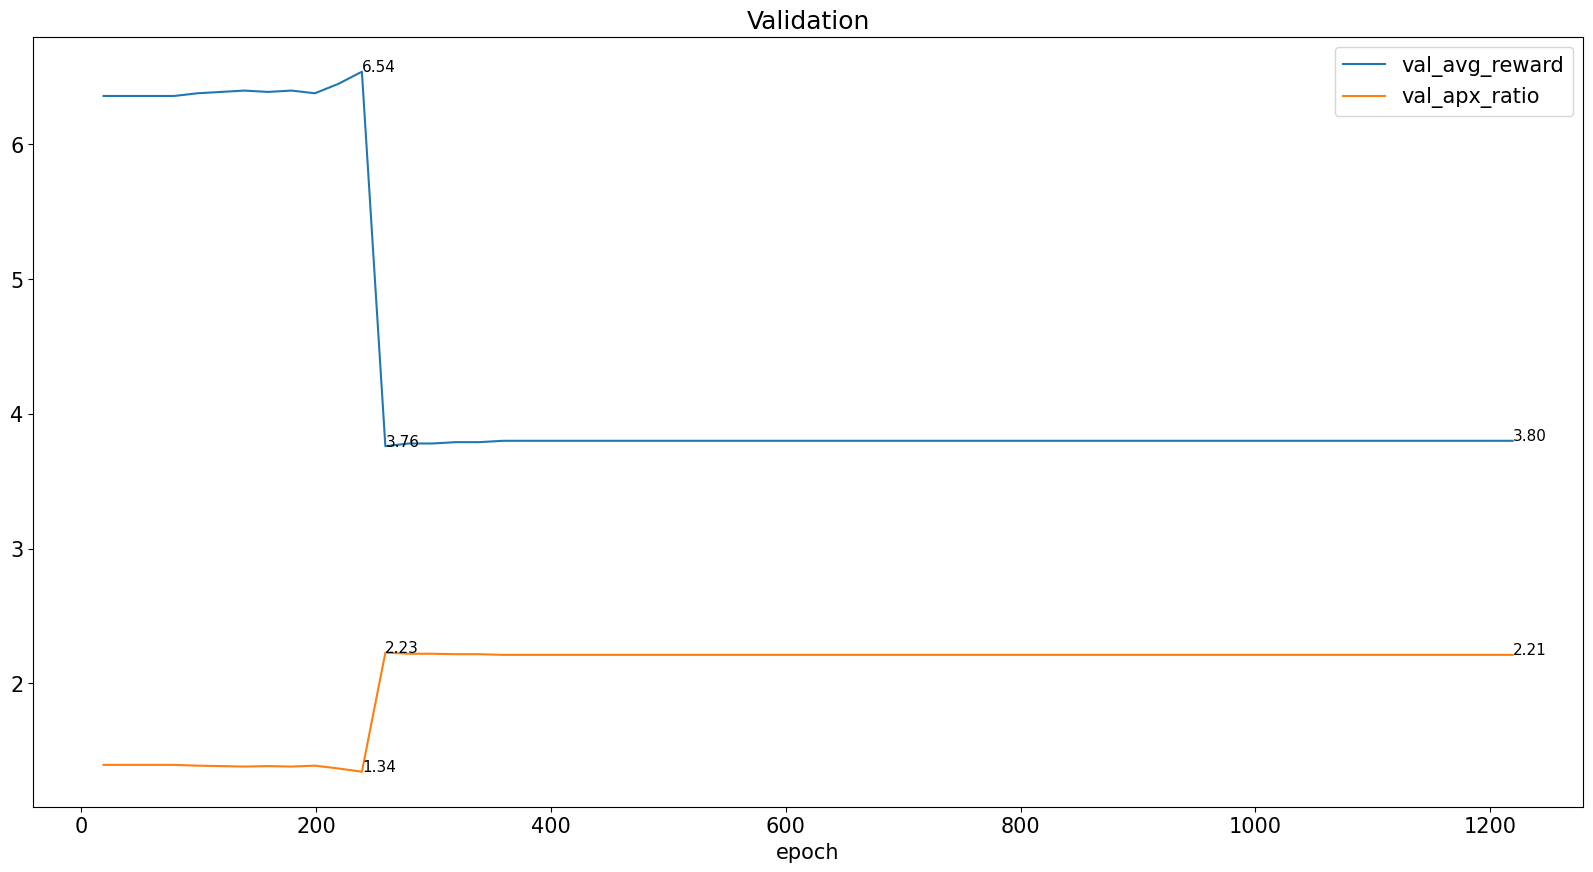

In [1491]:
display(metrics, 'val', 'Validation')

In [1492]:
display(metrics, 'apx_ratio_avg', 'apx_ratio_avg')

TypeError: no numeric data to plot

In [ ]:
display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [ ]:
for ax in axes:
    plt.close(ax.get_figure())